In [1]:
import pandas as pd
import warnings
import numpy as np
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import time
time1=time.time()

In [2]:
df = pd.read_excel('C:\勞動回歸.xlsx', dtype='float')
df['year'] = pd.Series(pd.date_range('1978', periods=40, freq='Y'))#.dt.year
df['year'] = pd.to_datetime(df['year'])
df.set_index('year' , inplace=True)
df

,勞動參與率,就業者,勞動力
year,,,
1978-12-31,58.76,6231.0,6337.0
1979-12-31,58.73,6432.0,6515.0
1980-12-31,58.26,6547.0,6629.0
1981-12-31,57.82,6672.0,6764.0
1982-12-31,57.93,6811.0,6959.0
1983-12-31,59.26,7070.0,7266.0
1984-12-31,59.72,7308.0,7491.0
1985-12-31,59.49,7428.0,7651.0
1986-12-31,60.37,7733.0,7945.0


In [3]:
Y=df.iloc[:, 1]
x=df.iloc[:, 2]
X=df.iloc[:, 2]
lpr=df.iloc[:, 0]
X = sm.add_constant(X) #加入常數項
Y

year
1978-12-31     6231.0
1979-12-31     6432.0
1980-12-31     6547.0
1981-12-31     6672.0
1982-12-31     6811.0
1983-12-31     7070.0
1984-12-31     7308.0
1985-12-31     7428.0
1986-12-31     7733.0
1987-12-31     8022.0
1988-12-31     8107.0
1989-12-31     8258.0
1990-12-31     8283.0
1991-12-31     8439.0
1992-12-31     8632.0
1993-12-31     8745.0
1994-12-31     8939.0
1995-12-31     9045.0
1996-12-31     9068.0
1997-12-31     9176.0
1998-12-31     9289.0
1999-12-31     9385.0
2000-12-31     9491.0
2001-12-31     9383.0
2002-12-31     9454.0
2003-12-31     9573.0
2004-12-31     9786.0
2005-12-31     9942.0
2006-12-31    10111.0
2007-12-31    10294.0
2008-12-31    10403.0
2009-12-31    10279.0
2010-12-31    10493.0
2011-12-31    10709.0
2012-12-31    10860.0
2013-12-31    10967.0
2014-12-31    11079.0
2015-12-31    11198.0
2016-12-31    11267.0
2017-12-31    11352.0
Name: 就業者, dtype: float64

In [4]:
model = sm.OLS(Y,X)
results = model.fit()

In [5]:
print(results.summary())
results_summary=results.summary()

                            OLS Regression Results                            
Dep. Variable:                    就業者   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Wed, 07 Nov 2018   Prob (F-statistic):           2.37e-49
Time:                        14:25:41   Log-Likelihood:                -232.65
No. Observations:                  40   AIC:                             469.3
Df Residuals:                      38   BIC:                             472.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        519.1173     78.018      6.654      0.0

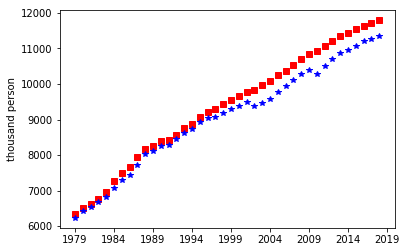

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(x,'rs', label='勞動力')
plt.plot(Y,'b*', label='就業人數')
plt.ylabel('thousand person')
plt.show()
plt.savefig("勞動力與就業人數.jpg")

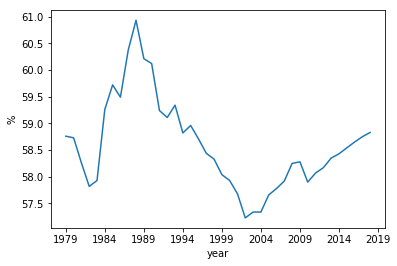

In [7]:
plt.xlabel('year')
plt.ylabel('%')
plt.plot(lpr)
plt.savefig("勞動參與率.jpg")

In [8]:
def testStationarity(Y):
    dftest = adfuller(Y)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
print(testStationarity(Y))

Test Statistic                 -2.056272
p-value                         0.262457
#Lags Used                      0.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


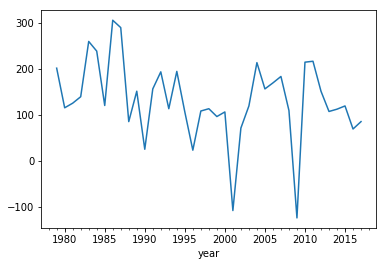

year
1979-12-31    201.0
1980-12-31    115.0
1981-12-31    125.0
1982-12-31    139.0
1983-12-31    259.0
1984-12-31    238.0
1985-12-31    120.0
1986-12-31    305.0
1987-12-31    289.0
1988-12-31     85.0
1989-12-31    151.0
1990-12-31     25.0
1991-12-31    156.0
1992-12-31    193.0
1993-12-31    113.0
1994-12-31    194.0
1995-12-31    106.0
1996-12-31     23.0
1997-12-31    108.0
1998-12-31    113.0
1999-12-31     96.0
2000-12-31    106.0
2001-12-31   -108.0
2002-12-31     71.0
2003-12-31    119.0
2004-12-31    213.0
2005-12-31    156.0
2006-12-31    169.0
2007-12-31    183.0
2008-12-31    109.0
2009-12-31   -124.0
2010-12-31    214.0
2011-12-31    216.0
2012-12-31    151.0
2013-12-31    107.0
2014-12-31    112.0
2015-12-31    119.0
2016-12-31     69.0
2017-12-31     85.0
Name: 就業者, dtype: float64 
 Test Statistic                 -5.028791
p-value                         0.000019
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)    

In [19]:
#對資料做一階差分

data_diff1 = Y.diff()
# 差分後需要排空
data_diff1 = data_diff1.dropna()
data_diff1.plot()
plt.show()

print(data_diff1, '\n', testStationarity(data_diff1))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


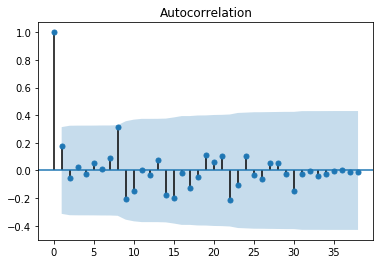

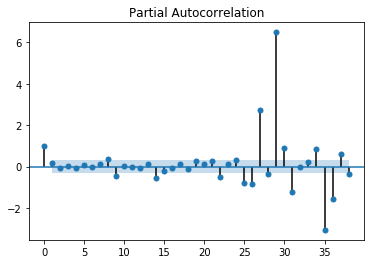

In [21]:
#畫出Y的1階差分的自我相關與偏相關
plot_acf(data_diff1).show()
plot_pacf(data_diff1).show()

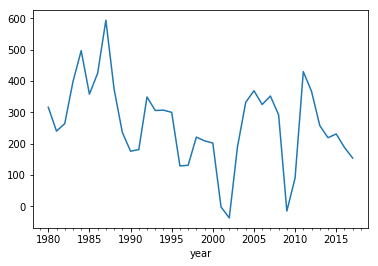

year
1980-12-31    316.0
1981-12-31    240.0
1982-12-31    264.0
1983-12-31    398.0
1984-12-31    497.0
1985-12-31    358.0
1986-12-31    425.0
1987-12-31    594.0
1988-12-31    374.0
1989-12-31    236.0
1990-12-31    176.0
1991-12-31    181.0
1992-12-31    349.0
1993-12-31    306.0
1994-12-31    307.0
1995-12-31    300.0
1996-12-31    129.0
1997-12-31    131.0
1998-12-31    221.0
1999-12-31    209.0
2000-12-31    202.0
2001-12-31     -2.0
2002-12-31    -37.0
2003-12-31    190.0
2004-12-31    332.0
2005-12-31    369.0
2006-12-31    325.0
2007-12-31    352.0
2008-12-31    292.0
2009-12-31    -15.0
2010-12-31     90.0
2011-12-31    430.0
2012-12-31    367.0
2013-12-31    258.0
2014-12-31    219.0
2015-12-31    231.0
2016-12-31    188.0
2017-12-31    154.0
Name: 就業者, dtype: float64 
 Test Statistic                 -2.897927
p-value                         0.045590
#Lags Used                      7.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Cr

In [10]:
#對資料做二階差分
data_diff2 = Y.diff(2)

# 差分後需要排空
data_diff2 = data_diff2.dropna()
data_diff2.plot()
plt.show()

print(data_diff2, '\n', testStationarity(data_diff2))

In [11]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [12]:
#尋找最適ARIMA模型
for param in pdq:
    try:
            mod = ARIMA(Y,
                        order=param,
                        freq='A-DEC')
                                          
            results = mod.fit()
            print('ARIMA{} - Results:{}'.format(param, results.aic))
    except:
            continue

ARIMA(0, 0, 0) - Results:700.6970708682129
ARIMA(0, 0, 1) - Results:654.4420683588561
ARIMA(0, 1, 0) - Results:461.69956939453397


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

ARIMA(0, 1, 1) - Results:462.2162553626489
ARIMA(0, 1, 2) - Results:464.02385108827696
ARIMA(0, 2, 0) - Results:469.23993560035024
ARIMA(0, 2, 1) - Results:453.45753861806435
ARIMA(0, 2, 2) - Results:454.4299040440105
ARIMA(1, 0, 0) - Results:529.3930771768446
ARIMA(1, 0, 1) - Results:513.2716019022482
ARIMA(1, 0, 2) - Results:510.7544414936231
ARIMA(1, 1, 0) - Results:462.4442923387285
ARIMA(1, 1, 1) - Results:463.9711859391199
ARIMA(1, 2, 0) - Results:466.15827967088364
ARIMA(1, 2, 2) - Results:456.05631296000536
ARIMA(2, 0, 0) - Results:501.91722699257434


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 0) - Results:464.16324643637347
ARIMA(2, 1, 1) - Results:465.97116668029355
ARIMA(2, 2, 0) - Results:463.14270205923856


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ARIMA(2, 2, 1) - Results:456.1071655404521
ARIMA(2, 2, 2) - Results:458.01422313264845


In [13]:
#ARIMA模型結果輸出
mod =ARIMA(Y,order=(0, 2, 1))
results = mod.fit()
print(results.summary().tables[1])

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.1459      1.183     -1.814      0.078      -4.464       0.172
ma.L1.D2.就業者    -1.0000      0.094    -10.684      0.000      -1.183      -0.817


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1980-12-31     -2.145949
1981-12-31     39.781077
1982-12-31     17.708102
1983-12-31      0.635128
1984-12-31    -97.637846
1985-12-31    -66.010821
1986-12-31     42.416205
1987-12-31   -126.906770
1988-12-31   -100.729744
1989-12-31     90.797282
1990-12-31     20.397035
1991-12-31    132.051333
1992-12-31     -1.175488
1993-12-31    -37.594616
1994-12-31     37.432410
1995-12-31    -42.990565
1996-12-31     40.215873
1997-12-31    114.224598
1998-12-31     25.540512
1999-12-31     17.367538
2000-12-31     30.585040
2001-12-31     17.503407
2002-12-31    219.292093
2003-12-31     36.467307
2004-12-31    -13.217334
2005-12-31   -105.239539
2006-12-31    -48.598838
2007-12-31    -61.544829
2008-12-31    -75.085783
2009-12-31     -3.195539
2010-12-31    220.245465
2011-12-31   -116.220655
2012-12-31   -116.784160
2013-12-31    -52.407045
2014-12-31    -10.312792
2015-12-31    -17.033386
2016-12-31    -25.529784
2017-12-31     21.680315
Freq: A-DEC, dtype: float64


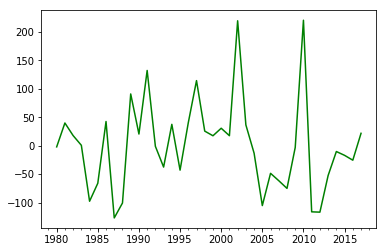

In [14]:
#樣本內預測結果
predict_diff2 = results.predict() # predict 2st difference result
predict_diff2.plot(color = 'green')
print(predict_diff2)

In [15]:
#樣本內預測_直接計算預測值
predtest = results.predict(, typ='levels')

1980-12-31     6630.854051
1981-12-31     6701.781077
1982-12-31     6814.708102
1983-12-31     6950.635128
1984-12-31     7231.362154
1985-12-31     7479.989179
1986-12-31     7590.416205
1987-12-31     7911.093230
1988-12-31     8210.270256
1989-12-31     8282.797282
1990-12-31     8429.397035
1991-12-31     8440.051333
1992-12-31     8593.824512
1993-12-31     8787.405384
1994-12-31     8895.432410
1995-12-31     9090.009435
1996-12-31     9191.215873
1997-12-31     9205.224598
1998-12-31     9309.540512
1999-12-31     9419.367538
2000-12-31     9511.585040
2001-12-31     9614.503407
2002-12-31     9494.292093
2003-12-31     9561.467307
2004-12-31     9678.782666
2005-12-31     9893.760461
2006-12-31    10049.401162
2007-12-31    10218.455171
2008-12-31    10401.914217
2009-12-31    10508.804461
2010-12-31    10375.245465
2011-12-31    10590.779345
2012-12-31    10808.215840
2013-12-31    10958.592955
2014-12-31    11063.687208
2015-12-31    11173.966614
2016-12-31    11291.470216
2

In [16]:
#預測1980-2050年
pred = results.predict('19801231', '20501231', typ='levels') 
#typ=levels意思為預測結果直接帶入原始值計算；liner的意思為直接輸出ARIMA(Y)的預測結果

In [17]:
#計算成長率
gr= pred.shift(-1)/pred

#因為第一年沒有成長率，故將成長率結果下移，並把第一格成長率設為0
gr = gr-1
gr[1:71] = gr[0:70]
gr[0]=0

总共耗时：2.9727725982666016s


In [ ]:
#整理資料成DATAFRAME，輸出至EXCEL
output ={'預測值':pred, '成長率':gr}
output= pd.DataFrame(output)
output
output.to_excel('output.xlsx')

In [ ]:
#計算耗時
time2=time.time()
print('總共耗時：' + str(time2 - time1) + 's')